# Plotting with Python and Jupyter Notebooks

We will be using the `pyplot` class from the `matplotlib` python package. There are other packages that are built for plotting, some for specific purposes for example I use `yt` for plotting hdf5 output from hydrodynamical simulations. 

In [ ]:
# for Sean's use
# /Users/sean/GitRepos/TorchAnalysis/ytPlotting

In [1]:
import matplotlib.pyplot as plt # plt is typically what I use
import numpy as np # we'll need some numpy stuff in a bit

Plotting is enormously useful in physics not only for presenting data in a professional fashion but also for understanding data in the first place. There have been many times for me where I've built up a complicated system and it wasn't until I pinned down and plotted one aspect that I could then understand what was happening.

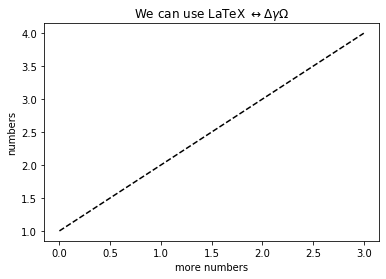

In [6]:
plt.plot([1,2,3,4], 'k--')
plt.ylabel('numbers')
plt.xlabel('more numbers')
plt.title('We can use LaTeX $\leftrightarrow \Delta \gamma \Omega$')

plt.show()

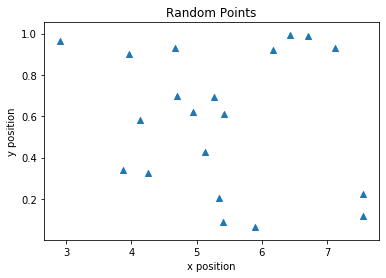

In [3]:
N = 20
x = np.random.normal(5,1.2,N)
#normal random distribution around five, SD of 1.2
y = np.random.uniform(0,1,N)
#uniform random distribution from 0 to 1


plt.scatter(x,y, marker='^')
plt.title('Random Points')
plt.xlabel('x position')
plt.ylabel('y position')
plt.show()

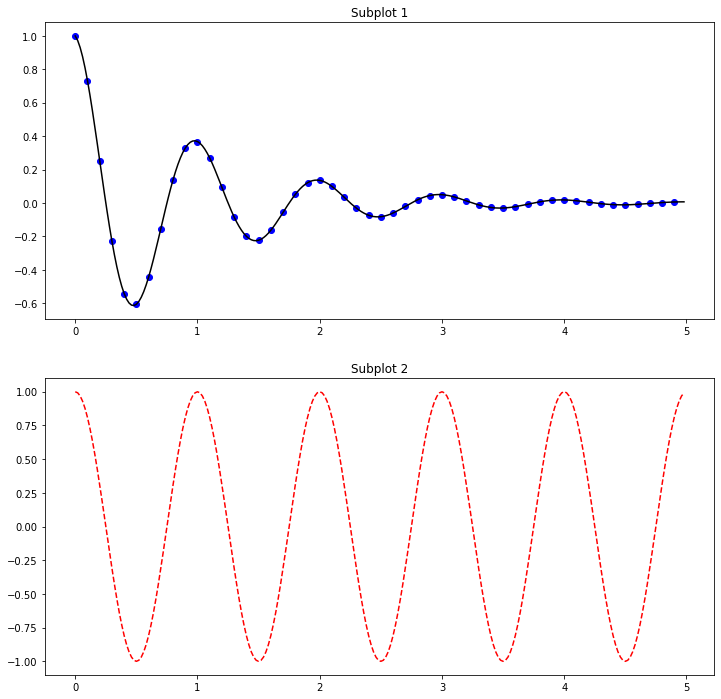

In [8]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0., 5., .1)
t2 = np.arange(0., 5., .02)

plt.figure(1, figsize=(12,12))
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')
plt.title('Subplot 1')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.title('Subplot 2')
plt.savefig('./subplot_example.png')
#this is how to save a figure created on a Jupyter notebook
plt.show()

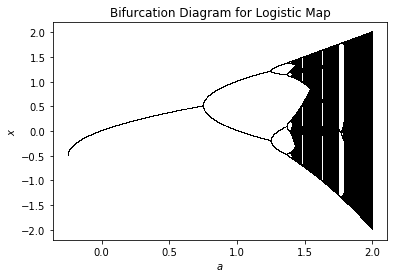

In [9]:
def log_map(x,a):
    return a-x*x

num_a = 10000
num_discard = 300
num_keep = 1000

a = np.linspace(-0.25, 2, num_a)
x = np.ones_like(a)*0.1

#Call figure to be saved onto
fig= plt.figure()

#Number of transients
for i in range(num_discard):
    x = log_map(x,a)

for i in range(num_keep):
    plt.plot(a,x,'k,')
    x = log_map(x,a)

plt.title("Bifurcation Diagram for Logistic Map")
plt.xlabel('$a$')
plt.ylabel('$x$')

#fig.savefig('log.eps')
plt.show()

Let's set up a histogram plot. Set variables for the center of our normalized distribution (mu) and its standard deviation (sigma).

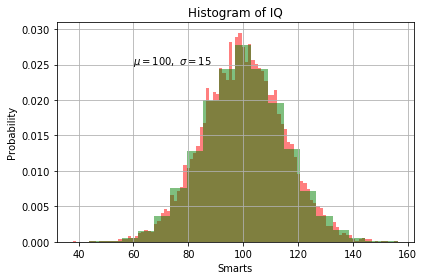

In [12]:
# We can set two variables in the same line if we want.
mu, sigma = 100, 15

# Assign x to our 'mu' + sigma times a normal distribution of 10000 floats between 0 and 1
x = mu + sigma * np.random.randn(10000)

# Play around with which histogram we choose to plot. We can also plot both at once!
plt.hist(x,100, density=True, facecolor='r', alpha=0.5)
plt.hist(x,20, density=True, facecolor='g', alpha=0.5)

#note that this method of plotting creates a histogram

xl, xu = plt.xlim() # Isolate the extreme values, we can use these to set our plot's xlim later.

#windowdressing
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
# plt.text(a,b, '<sample_text>') where 'a' and 'b' are values corresponding to the plot's x and y coordinates.
plt.text(60,.025, '$\mu=100,\ \sigma=15$')
plt.tight_layout()
plt.grid(True)
plt.xlim(xl,xu)
plt.show()

We want to open a file with a list of words in it. For each word present, create a dictionary key and increment the value by 1, thereby keeping track of each word that appears in the file and how many times each individual word appears.

['happy\n', 'brown\n', 'cat\n', 'fluffy\n', 'goat\n', 'cow\n', 'moose\n', 'linux\n', 'zebra\n', 'house\n']
[4, 4, 4, 8, 8, 4, 8, 8, 4, 4]


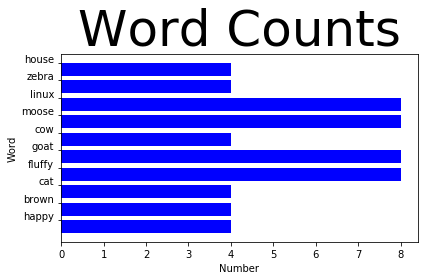

In [15]:
import os
file = open('../Lesson3/words.txt','r') # create variable for our opened file
Dict = {} # empty dictionary

# Let's make a loop that goes through each word in the file. 
# Then, if the word is already in our dictionary, increment its value by 1. 
# If the word is not present, create a new key and set its value to 1.

for _ in file:
    if _ in Dict:
        Dict[_] += 1
    else:
        Dict[_] = 1




# Next, we want to set up two lists that we are able to plot.
# Make x a list of each unique word in Dict.
# Make y the corresponding key value for each word.
x = []
y = []

# Use a loop to assign values to these lists
for _ in Dict:
    x.append(_.strip('/n'))
    y.append(Dict[_])

# Check if things look good by printing out our vectors
print(x)
print(y)

# I'll set the figure up for us
fig, ax = plt.subplots()

# Doing stuff for axis ticks
ind = np.arange(len(y))
width = 0.75 #width of bars
ax.barh(ind,y, width, color='b')
ax.set_yticklabels(x, minor=False)
ax.set_yticks(ind+width/2)

# Setting up the labels, notice we can control the text size here!
plt.title('Word Counts',size=50)
plt.xlabel('Number')
plt.ylabel('Word')
plt.tight_layout()

# We can save the file if we want.
# The os.path.join() function takes your current python path (where this jupyter notebook exists)
# and appends the string in the () to it. 

#plt.savefig(os.path.join('counts.png'), format='png')
plt.show()

## Putting some things together.

Let's take a user defined pair of 3d vectors, do some calculation, pass through some conditional statements, and plot some things! 

In [17]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = [int(x) for x in input('x: ').split()] # input for 3d vector looks like: 8 -3 4
y = [int(x) for x in input('y: ').split()]

# compute the cross and dot products of the input vectors.
comp_c = np.cross(x,y)
comp_d = np.dot(x,y)

#numpy functions for dot and cross products

# I'll put the vectors we will eventually plot in a list.
vecs = [x,y,comp_c]
# And their labels.
ls = ['x','y','cross']

# Come up with an if, elif, else statement to check our cross and dot computations to report 
# whether vectors x and y are parallel, perpendicular, or neither.

if not comp_c.any():
    out = 'parallel!'
    
elif comp_d == 0 :
    out = 'Perpendicular'

else:
    out = 'neither'

# Print the result of parallel, perpendicular, or neither
print("The vectors are %s"%(__your_string__))

# Make a matplotlib figure of size (10,10) and assign it to the variable fig
fig = plt.figure(figsize(10,10))
# I'll assign this figure to a set of 3d axes
ax = fig.add_subplot(111, projection='3d')

# I'll make a list of 4 different color options
c = ['r','b','g','k']

# Find a way to cycle through each vector, plot their x,y,z values,
# assign a unique color and the correct label.




# I'll finish up our plot!
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend(loc='best')
plt.show()

x: 25
y: 2


ValueError: incompatible dimensions for cross product
(dimension must be 2 or 3)

Extra: Can you develop a function that takes in two vectors and does the plotting from the previous cell?